In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

df = pd.read_csv('oasis_longitudinal.csv')
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df.groupby(['Visit', 'Group']).size
#df = df.drop(['Subject ID','MRI ID'], axis=1)
df.head()
#g = sns.pairplot(df, hue="Group", palette="husl")


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [111]:
pd.isnull(df).sum()
df= df.dropna(axis=0, how='any')
pd.isnull(df).sum()
df.shape

(354, 15)

In [112]:

df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column

df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df.head()
pd.isnull(df).sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

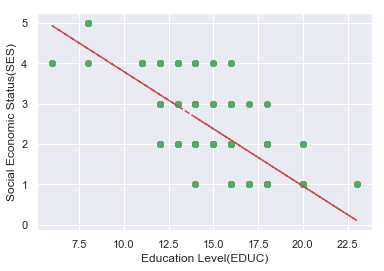

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [113]:
# Draw scatter plot between EDUC and SES
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()
df.groupby(['EDUC'])['SES'].median()
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)
pd.isnull(df['SES']).value_counts()
df.isnull().sum()


In [114]:
df= df.drop(['Subject ID','MRI ID','Hand', 'Age'], axis =1)
df.head()


,Group,Visit,MR Delay,M/F,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,1,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,1,14,2.0,30.0,0.0,2004,0.681,0.876
5,0,1,0,0,18,3.0,28.0,0.0,1215,0.710,1.444
6,0,2,538,0,18,3.0,27.0,0.0,1200,0.718,1.462
7,0,1,0,1,12,4.0,28.0,0.0,1689,0.712,1.039


In [ ]:
g = sns.pairplot(df, hue="Group", palette="husl")

(0, 0.16)

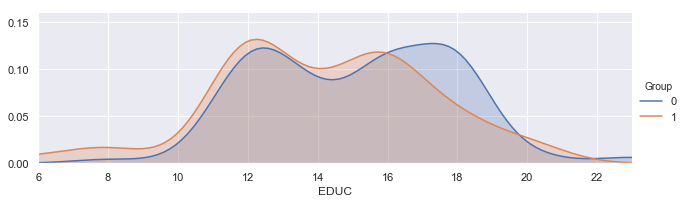

In [133]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)


In [ ]:
df.groupby(['EDUC', 'Group']).size()
A =df[df['Group']==0]
X = list(A['EDUC'])
X

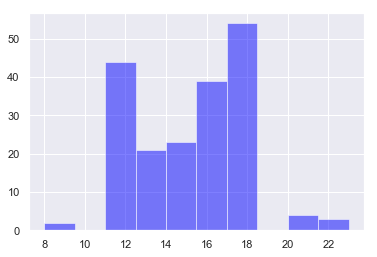

In [157]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
num_bins =10

n, bins, patches = plt.hist(X, num_bins, facecolor='blue', alpha=0.5)
plt.show()